In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('dirty_cafe_sales.csv')

In [3]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
# Change Required Datatype
data['Quantity']=pd.to_numeric(data['Quantity'], errors="coerce")
data['Price Per Unit']=pd.to_numeric(data['Price Per Unit'], errors="coerce")
data['Total Spent']=pd.to_numeric(data['Total Spent'], errors="coerce")
data['Transaction Date']=pd.to_datetime(data['Transaction Date'], errors="coerce")

#Change Categorial Datatype
data['Item']=data['Item'].astype('category')
data['Payment Method']=data['Payment Method'].astype('category')
data['Location']=data['Location'].astype('category')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   category      
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   category      
 6   Location          6735 non-null   category      
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.8+ KB


In [6]:
data.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)
print(data.head())

  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0          4.0   
1    TXN_4977031    Cake       4.0             3.0         12.0   
2    TXN_4271903  Cookie       4.0             1.0          NaN   
3    TXN_7034554   Salad       2.0             5.0         10.0   
4    TXN_3160411  Coffee       2.0             2.0          4.0   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3             NaN       NaN       2023-04-27  
4  Digital Wallet  In-store       2023-06-11  


C:\Users\cex\AppData\Local\Temp\ipykernel_14376\3291839033.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)


In [7]:
data.isna().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [8]:
data["Total Spent"] = data["Total Spent"].fillna(
        (data["Quantity"] * data["Price Per Unit"]).where(data["Quantity"].notna() & data["Price Per Unit"].notna()))

data["Price Per Unit"] = data["Price Per Unit"].fillna(
        (data["Total Spent"] / data["Quantity"]).where(data["Total Spent"].notna() & data["Quantity"].notna()))

data["Quantity"] = data["Quantity"].fillna(
        (data["Total Spent"] / data["Price Per Unit"]).where(data["Total Spent"].notna() & data["Price Per Unit"].notna()))


In [9]:
data.isnull().sum()

Transaction ID         0
Item                 969
Quantity              38
Price Per Unit        38
Total Spent           40
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### Let's count the unique values in the ‘Item’ variable, find their price per unit. Let's also calculate how many units of each product were sold on average.



In [11]:
data.groupby("Item").agg({"Price Per Unit" :"mean",
                        "Quantity": "mean"})


C:\Users\cex\AppData\Local\Temp\ipykernel_14376\1136114919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Item").agg({"Price Per Unit" :"mean",


,Price Per Unit,Quantity
Item,,
Cake,3.0,3.050220
Coffee,2.0,3.049180
Cookie,1.0,2.969641
Juice,3.0,3.000856
Salad,5.0,3.028821
Sandwich,4.0,3.040853
Smoothie,4.0,3.049451
Tea,1.5,3.036900


In [12]:
#data['Quantity'].fillna(data.groupby('Item')['Quantity'].mean(numeric_only=True), inplace=True)
data.loc[data["Quantity"].isnull(), "Quantity"] = data.groupby("Item")["Quantity"].transform("mean")
data.loc[data["Price Per Unit"].isnull(), "Price Per Unit"] = data.groupby("Item")["Price Per Unit"].transform("mean")
data.loc[data["Total Spent"].isnull(), "Total Spent"] = data.groupby("Item")["Total Spent"].transform("mean")

data.isnull().sum()


C:\Users\cex\AppData\Local\Temp\ipykernel_14376\2727793984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.loc[data["Quantity"].isnull(), "Quantity"] = data.groupby("Item")["Quantity"].transform("mean")
C:\Users\cex\AppData\Local\Temp\ipykernel_14376\2727793984.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.loc[data["Price Per Unit"].isnull(), "Price Per Unit"] = data.groupby("Item")["Price Per Unit"].transform("mean")
C:\Users\cex\AppData\Local\Temp\ipykernel_14376\2727793984.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

Transaction ID         0
Item                 969
Quantity               3
Price Per Unit         6
Total Spent            3
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### Fill in the missing values in the ‘Item’ variable.



In [14]:
print(data['Item'].isnull().sum())  # Will show number of NaNs in 'Item'


969


In [15]:
price_to_item = {
    3.000: "Juice",
    2.000: "Coffee",
    1.000: "Cookie",
    3.000: "Cake",
    5.000: "Salad",
    4.000: "Sandwich",
    4.000: "Smoothie",
    1.500: "Tea"
}
data["Item_New"] = data["Item"].copy()

data.loc[data['Item_New'].isnull(), 'Item_New']= data['Price Per Unit'].map(price_to_item)
data['Item']= data['Item_New']
data.isnull().sum()

Transaction ID         0
Item                   6
Quantity               3
Price Per Unit         6
Total Spent            3
Payment Method      3178
Location            3961
Transaction Date     460
Item_New               6
dtype: int64

In [16]:
# Filling with average again for ‘Quantity’
data.loc[data["Quantity"].isnull(), "Quantity"] = data.groupby("Item")["Quantity"].transform("mean")
data.loc[data["Total Spent"].isnull(), "Total Spent"] = data.groupby("Item")["Total Spent"].transform("mean")

# We filled the missing values of ‘Price Per Unit’ with the average
data.loc[data["Price Per Unit"].isnull(), "Price Per Unit"] = data["Price Per Unit"].mean()

# We filled the missing values of ‘Item’ with mode (the most frequent value)
data.loc[data["Item"].isnull(), "Item"] = data["Item"].mode()[0]

data.isnull().sum()

C:\Users\cex\AppData\Local\Temp\ipykernel_14376\3951378559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.loc[data["Quantity"].isnull(), "Quantity"] = data.groupby("Item")["Quantity"].transform("mean")
C:\Users\cex\AppData\Local\Temp\ipykernel_14376\3951378559.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.loc[data["Total Spent"].isnull(), "Total Spent"] = data.groupby("Item")["Total Spent"].transform("mean")


Transaction ID         0
Item                   0
Quantity               3
Price Per Unit         0
Total Spent            3
Payment Method      3178
Location            3961
Transaction Date     460
Item_New               6
dtype: int64

In [17]:
payment_methods = data['Payment Method'].dropna().unique()


In [18]:
payment_methods

['Credit Card', 'Cash', 'Digital Wallet']
Categories (3, object): ['Cash', 'Credit Card', 'Digital Wallet']

In [19]:
data['Payment Method'] = data['Payment Method'].astype('object')
#payment_methods = data['Payment Method'].value_counts(normalize=True)
data.loc[data['Payment Method'].isna(), 'Payment Method']= np.random.choice(payment_methods, size=data['Payment Method'].isna().sum())
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               3
Price Per Unit         0
Total Spent            3
Payment Method         0
Location            3961
Transaction Date     460
Item_New               6
dtype: int64

In [20]:
location_probs = data["Location"].value_counts(normalize=True)  # Calculate the distribution of Location
data['Location'] = data['Location'].astype('object')

# Filling in missing ‘Location’ values according to random distribution
data.loc[data["Location"].isna(), "Location"] = np.random.choice(
    location_probs.index,  # Location options ["Takeaway","In-stor"]
    size=data["Location"].isna().sum(),  # Select the number of missing rows
    p=location_probs.values)  # Determining the probabilities of elections

data.isnull().sum()

Transaction ID        0
Item                  0
Quantity              3
Price Per Unit        0
Total Spent           3
Payment Method        0
Location              0
Transaction Date    460
Item_New              6
dtype: int64

In [21]:
data.drop('Item_New', axis=1, inplace=True)


In [22]:
Trans_probs = data["Transaction Date"].value_counts(normalize=True)  # Calculate the distribution of Location
data['Transaction Date'] = data['Transaction Date'].astype('object')

# Filling in missing ‘Location’ values according to random distribution
data.loc[data["Transaction Date"].isna(), "Transaction Date"] = np.random.choice(
    Trans_probs.index,  # Location options ["Takeaway","In-stor"]
    size=data["Transaction Date"].isna().sum(),  # Select the number of missing rows
    p=Trans_probs.values)  # Determining the probabilities of elections

data.isnull().sum()

Transaction ID      0
Item                0
Quantity            3
Price Per Unit      0
Total Spent         3
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

<Axes: xlabel='Quantity'>

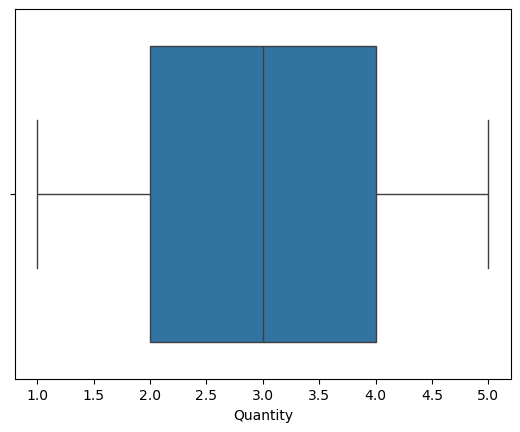

In [23]:
sns.boxplot(x=data['Quantity'])

<Axes: xlabel='Price Per Unit'>

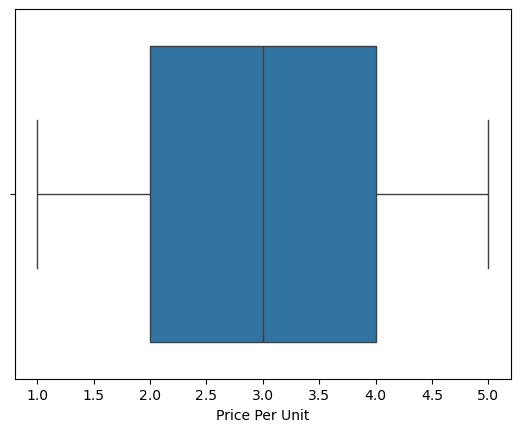

In [24]:
sns.boxplot(x=data['Price Per Unit'])

<Axes: xlabel='Total Spent'>

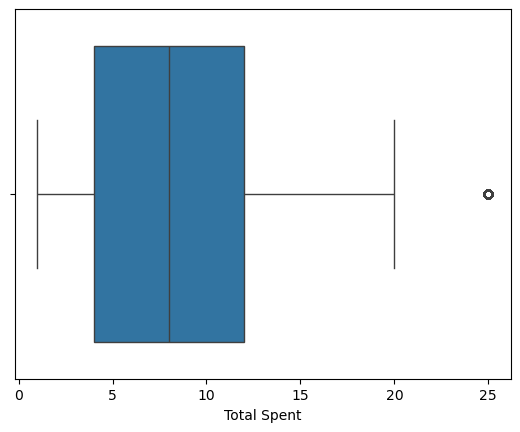

In [25]:
sns.boxplot(x=data['Total Spent'])

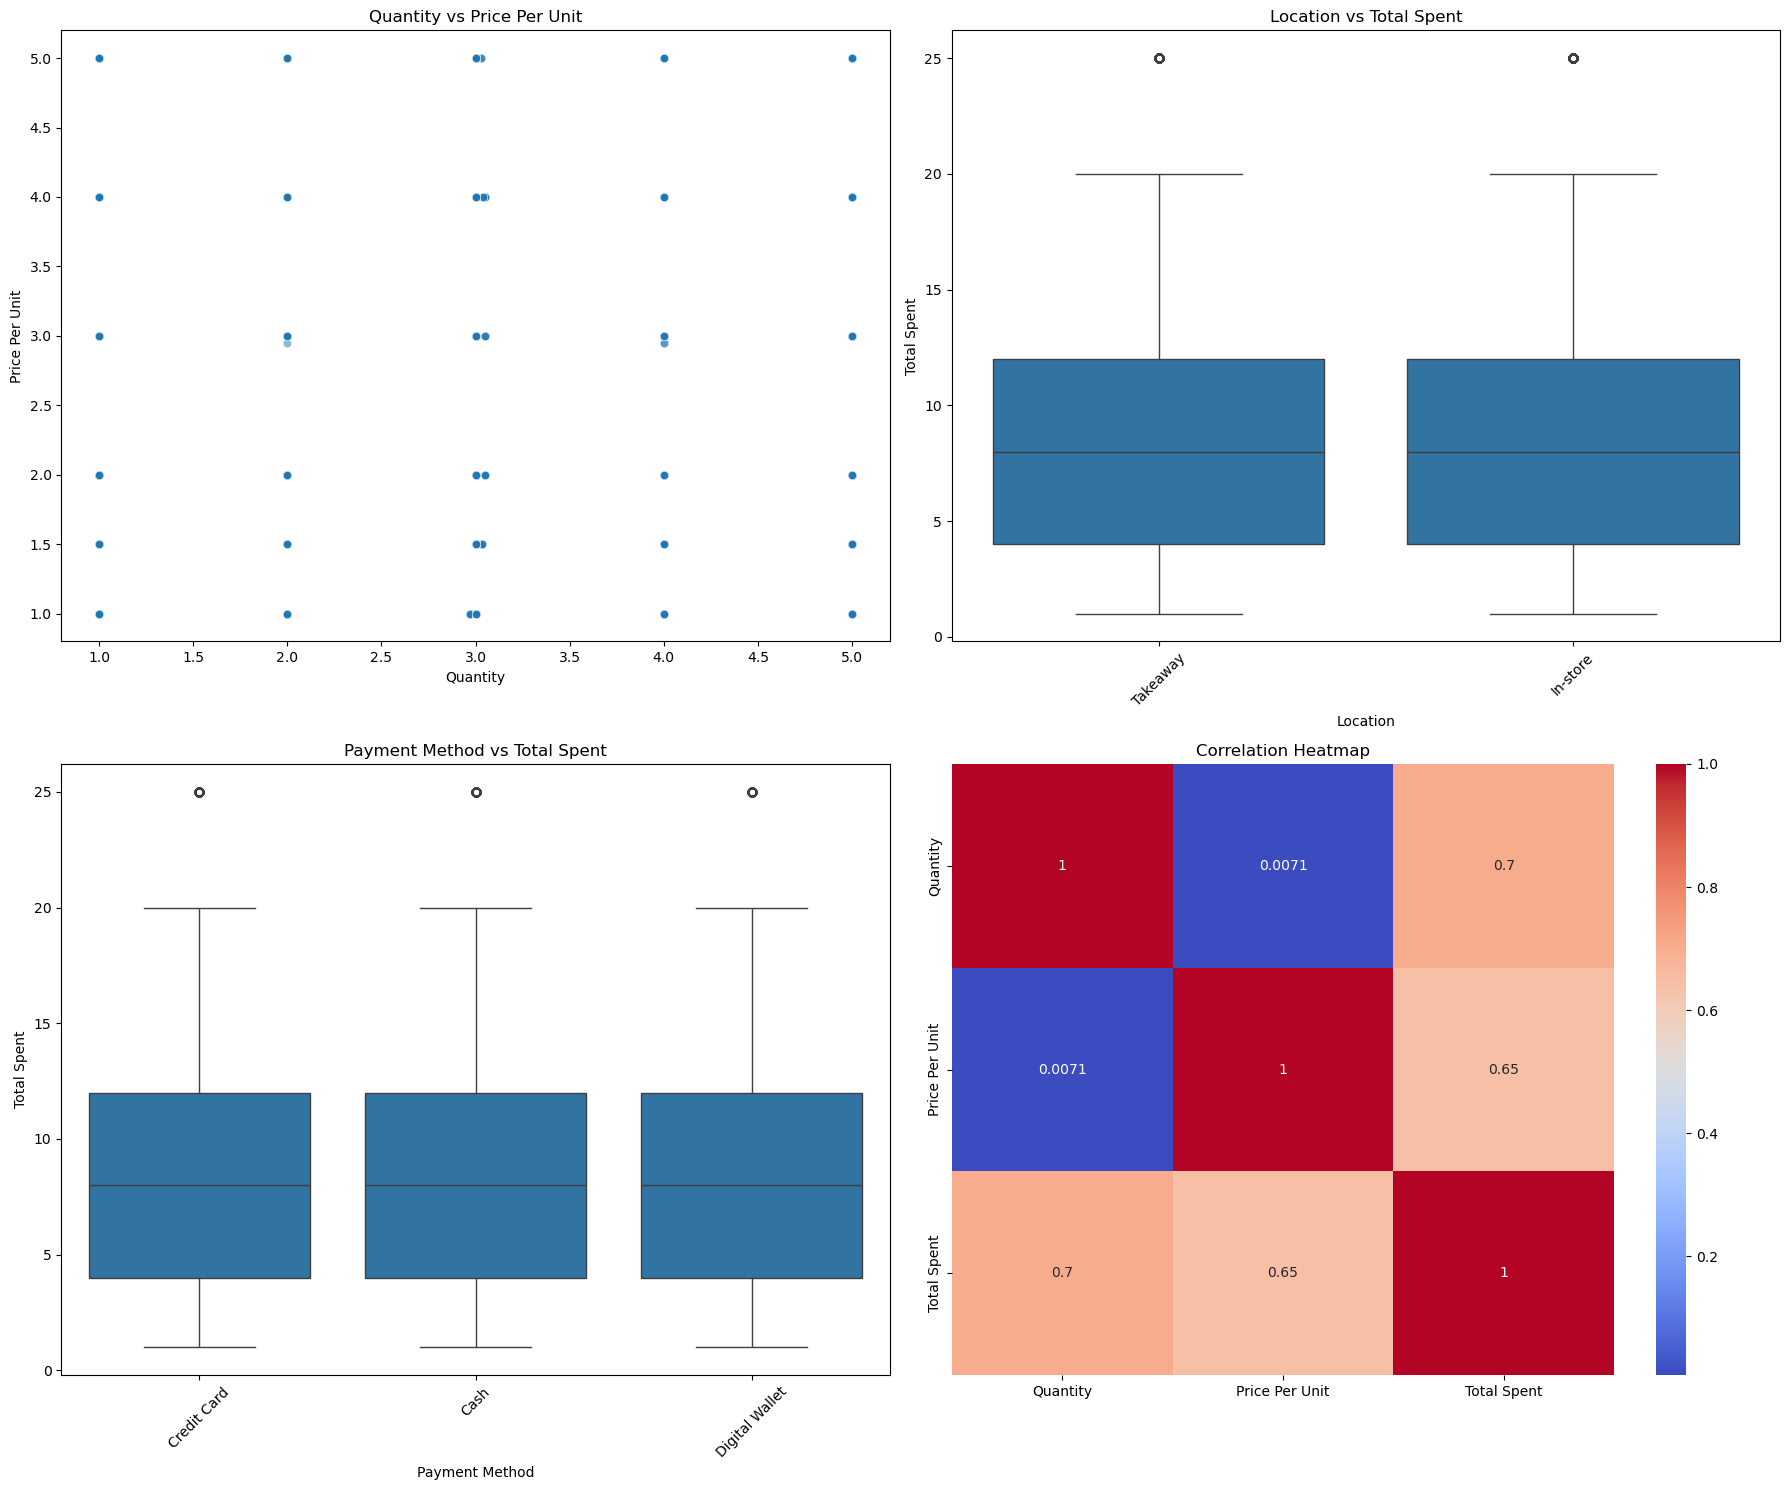

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# Plot 1: Quantity vs Price Per Unit
sns.scatterplot(x=data['Quantity'], y=data['Price Per Unit'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Quantity vs Price Per Unit")

# Plot 2: Location vs Total Spent
sns.boxplot(x=data['Location'], y=data['Total Spent'], ax=axes[0, 1])
axes[0, 1].set_title("Location vs Total Spent")
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Payment Method vs Total Spent
sns.boxplot(x=data['Payment Method'], y=data['Total Spent'], ax=axes[1, 0])
axes[1, 0].set_title("Payment Method vs Total Spent")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Heatmap of Correlation Matrix
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

# Adjusting layout and showing plots
plt.tight_layout()
plt.show()
